# Lab 4: Regression Analysis with Regularization Techniques

**Name:** Bishal Thapa     
**Course:** MSCS 634     


## Step 1: Data Preparation


In [79]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
try:
    plt.style.use('seaborn-v0_8')
except:
    try:
        plt.style.use('seaborn')
    except:
        plt.style.use('default')
sns.set_palette("husl")


In [80]:
# Loadinb the Diabetes dataset
diabetes = load_diabetes()
print(f"Number of samples: {diabetes.data.shape[0]}")
print(f"Number of features: {diabetes.data.shape[1]}")
print(f"Feature names: {diabetes.feature_names}")


Number of samples: 442
Number of features: 10
Feature names: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [81]:
# Create a DataFrame for easier exploration
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

# Display basic information about the dataset
print("Dataset Info:")
print(df.info())
print("\nFirst few rows:")
print(df.head())
print("\nDataset Statistics:")
print(df.describe())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB
None

First few rows:
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.0

In [82]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())
print(f"\nTotal missing values: {df.isnull().sum().sum()}")
#Since there are no missing values, no cleanup is required.


Missing values per column:
age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

Total missing values: 0


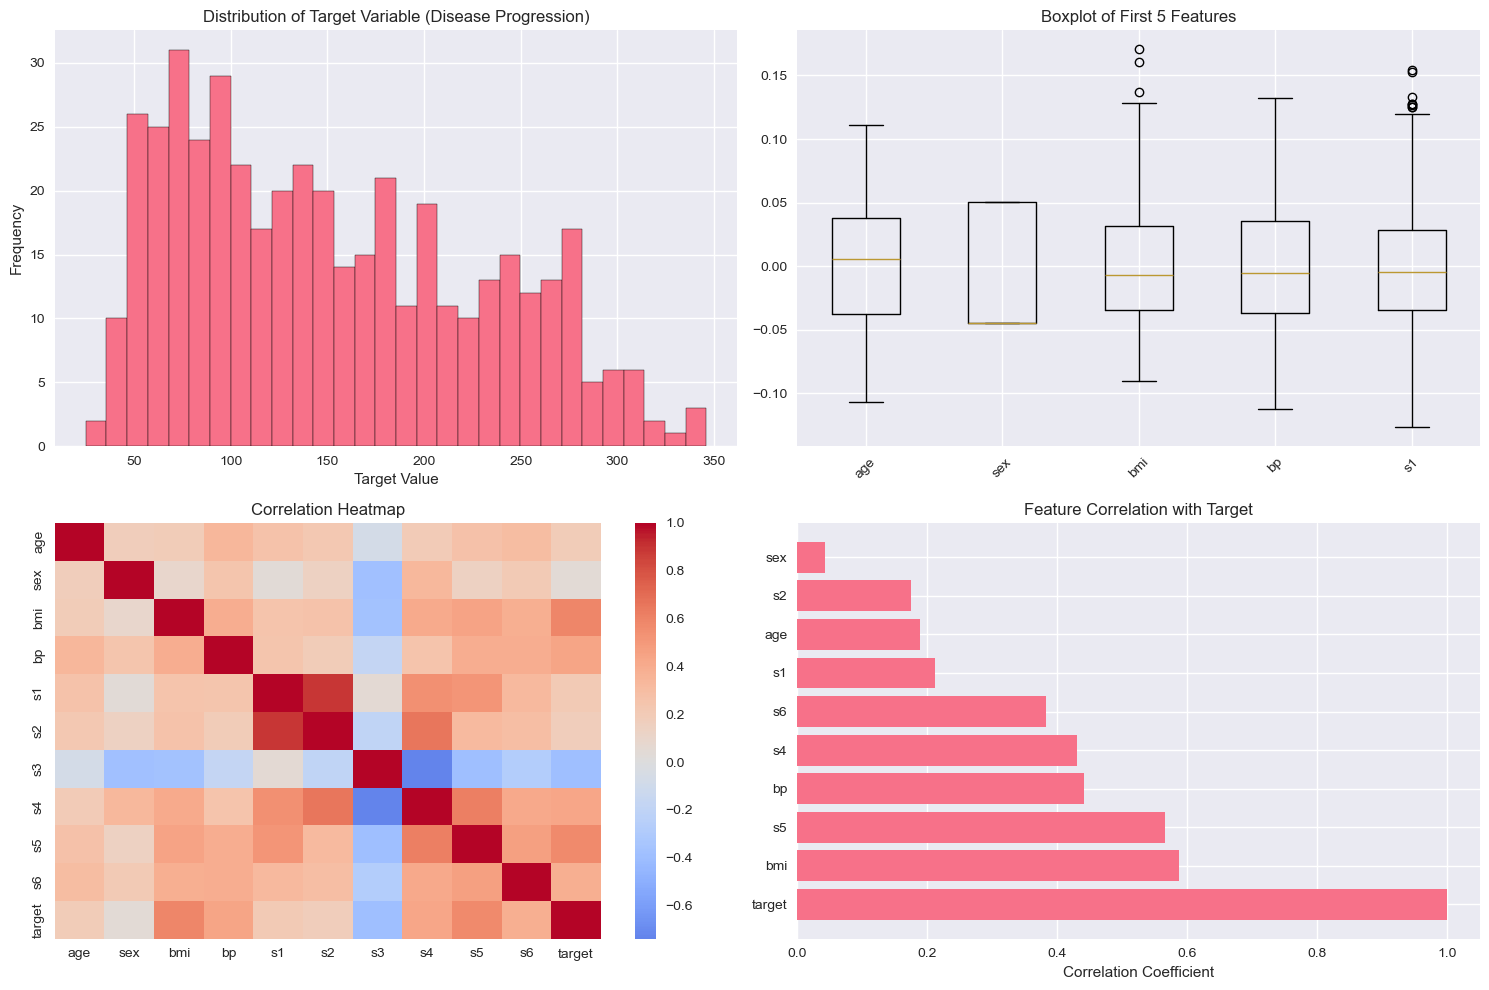

In [83]:
# Visualize data distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Target distribution
axes[0, 0].hist(df['target'], bins=30, edgecolor='black')
axes[0, 0].set_title('Distribution of Target Variable (Disease Progression)')
axes[0, 0].set_xlabel('Target Value')
axes[0, 0].set_ylabel('Frequency')

# Feature distributions
axes[0, 1].boxplot([df[col] for col in diabetes.feature_names[:5]], labels=diabetes.feature_names[:5])
axes[0, 1].set_title('Boxplot of First 5 Features')
axes[0, 1].tick_params(axis='x', rotation=45)

# Correlation heatmap
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0, ax=axes[1, 0])
axes[1, 0].set_title('Correlation Heatmap')

# Target vs feature correlation
target_corr = df.corr()['target'].sort_values(ascending=False)[:-1]
axes[1, 1].barh(range(len(target_corr)), target_corr.values)
axes[1, 1].set_yticks(range(len(target_corr)))
axes[1, 1].set_yticklabels(target_corr.index)
axes[1, 1].set_title('Feature Correlation with Target')
axes[1, 1].set_xlabel('Correlation Coefficient')

plt.tight_layout()
plt.show()


## Step 2: Linear Regression


In [84]:
# Prepare data for Simple Linear Regression
# Using 'bmi' (Body Mass Index) as it has the highest corelation coefficient with target
X_simple = diabetes.data[:, 2].reshape(-1, 1)  # bmi is the 3rd feature (index 2)
y = diabetes.target

# Split the data into training and testing sets
X_train_simple, X_test_simple, y_train, y_test = train_test_split(
    X_simple, y, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train_simple.shape[0]}")
print(f"Test set size: {X_test_simple.shape[0]}")


Training set size: 353
Test set size: 89


In [85]:
# Training Simple Linear Regression model
simple_lr = LinearRegression()
simple_lr.fit(X_train_simple, y_train)

# Make predictions
y_train_pred_simple = simple_lr.predict(X_train_simple)
y_test_pred_simple = simple_lr.predict(X_test_simple)

# Calculate evaluation metrics
train_mae_simple = mean_absolute_error(y_train, y_train_pred_simple)
train_mse_simple = mean_squared_error(y_train, y_train_pred_simple)
train_rmse_simple = np.sqrt(train_mse_simple)
train_r2_simple = r2_score(y_train, y_train_pred_simple)

test_mae_simple = mean_absolute_error(y_test, y_test_pred_simple)
test_mse_simple = mean_squared_error(y_test, y_test_pred_simple)
test_rmse_simple = np.sqrt(test_mse_simple)
test_r2_simple = r2_score(y_test, y_test_pred_simple)

print("Simple Linear Regression Results:")
print("=" * 50)
print("Training Set Metrics:")
print(f"  MAE:  {train_mae_simple:.4f}")
print(f"  MSE:  {train_mse_simple:.4f}")
print(f"  RMSE: {train_rmse_simple:.4f}")
print(f"  R²:   {train_r2_simple:.4f}")
print("\nTest Set Metrics:")
print(f"  MAE:  {test_mae_simple:.4f}")
print(f"  MSE:  {test_mse_simple:.4f}")
print(f"  RMSE: {test_rmse_simple:.4f}")
print(f"  R²:   {test_r2_simple:.4f}")
print(f"\nModel Equation: y = {simple_lr.coef_[0]:.4f} * x + {simple_lr.intercept_:.4f}")


Simple Linear Regression Results:
Training Set Metrics:
  MAE:  51.3797
  MSE:  3854.1127
  RMSE: 62.0815
  R²:   0.3657

Test Set Metrics:
  MAE:  52.2600
  MSE:  4061.8259
  RMSE: 63.7325
  R²:   0.2334

Model Equation: y = 998.5777 * x + 152.0034


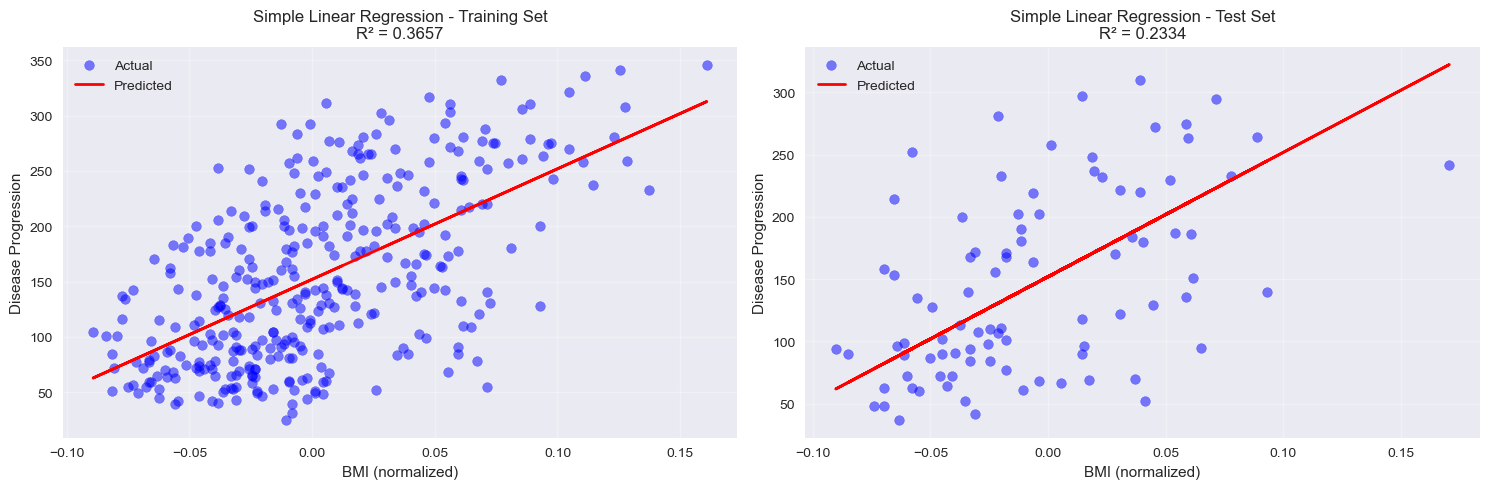

In [86]:
# Visualizing the model's predictions against the actual data. 
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Training set visualization
axes[0].scatter(X_train_simple, y_train, alpha=0.5, label='Actual', color='blue')
axes[0].plot(X_train_simple, y_train_pred_simple, color='red', linewidth=2, label='Predicted')
axes[0].set_xlabel('BMI (normalized)')
axes[0].set_ylabel('Disease Progression')
axes[0].set_title(f'Simple Linear Regression - Training Set\nR² = {train_r2_simple:.4f}')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Test data visualization
axes[1].scatter(X_test_simple, y_test, alpha=0.5, label='Actual', color='blue')
axes[1].plot(X_test_simple, y_test_pred_simple, color='red', linewidth=2, label='Predicted')
axes[1].set_xlabel('BMI (normalized)')
axes[1].set_ylabel('Disease Progression')
axes[1].set_title(f'Simple Linear Regression - Test Set\nR² = {test_r2_simple:.4f}')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## Step 3: Multiple Regression


In [87]:
# using data for Multiple Regression using all features
X_multiple = diabetes.data
y = diabetes.target

# Split the data into training and testing sets
X_train_multiple, X_test_multiple, y_train_multiple, y_test_multiple = train_test_split(
    X_multiple, y, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train_multiple.shape[0]}")
print(f"Test set size: {X_test_multiple.shape[0]}")
print(f"Number of features: {X_train_multiple.shape[1]}")


Training set size: 353
Test set size: 89
Number of features: 10


In [88]:
# Train Multiple Regression model
multiple_lr = LinearRegression()
multiple_lr.fit(X_train_multiple, y_train_multiple)

# Make predictions
y_train_pred_multiple = multiple_lr.predict(X_train_multiple)
y_test_pred_multiple = multiple_lr.predict(X_test_multiple)

# Calculate evaluation metrics
train_mae_multiple = mean_absolute_error(y_train_multiple, y_train_pred_multiple)
train_mse_multiple = mean_squared_error(y_train_multiple, y_train_pred_multiple)
train_rmse_multiple = np.sqrt(train_mse_multiple)
train_r2_multiple = r2_score(y_train_multiple, y_train_pred_multiple)

test_mae_multiple = mean_absolute_error(y_test_multiple, y_test_pred_multiple)
test_mse_multiple = mean_squared_error(y_test_multiple, y_test_pred_multiple)
test_rmse_multiple = np.sqrt(test_mse_multiple)
test_r2_multiple = r2_score(y_test_multiple, y_test_pred_multiple)

print("Multiple Regression Results:")
print("-" * 50)
print("Training Set Metrics:")
print(f"  MAE:  {train_mae_multiple:.4f}")
print(f"  MSE:  {train_mse_multiple:.4f}")
print(f"  RMSE: {train_rmse_multiple:.4f}")
print(f"  R²:   {train_r2_multiple:.4f}")
print("\nTest Set Metrics:")
print(f"  MAE:  {test_mae_multiple:.4f}")
print(f"  MSE:  {test_mse_multiple:.4f}")
print(f"  RMSE: {test_rmse_multiple:.4f}")
print(f"  R²:   {test_r2_multiple:.4f}")

# printing feature coefficients
print("\nFeature Coefficients:")
for i, feature_name in enumerate(diabetes.feature_names):
    print(f"  {feature_name}: {multiple_lr.coef_[i]:.4f}")
print(f"\nIntercept: {multiple_lr.intercept_:.4f}")


Multiple Regression Results:
--------------------------------------------------
Training Set Metrics:
  MAE:  43.4835
  MSE:  2868.5497
  RMSE: 53.5588
  R²:   0.5279

Test Set Metrics:
  MAE:  42.7941
  MSE:  2900.1936
  RMSE: 53.8534
  R²:   0.4526

Feature Coefficients:
  age: 37.9040
  sex: -241.9644
  bmi: 542.4288
  bp: 347.7038
  s1: -931.4888
  s2: 518.0623
  s3: 163.4200
  s4: 275.3179
  s5: 736.1989
  s6: 48.6707

Intercept: 151.3456


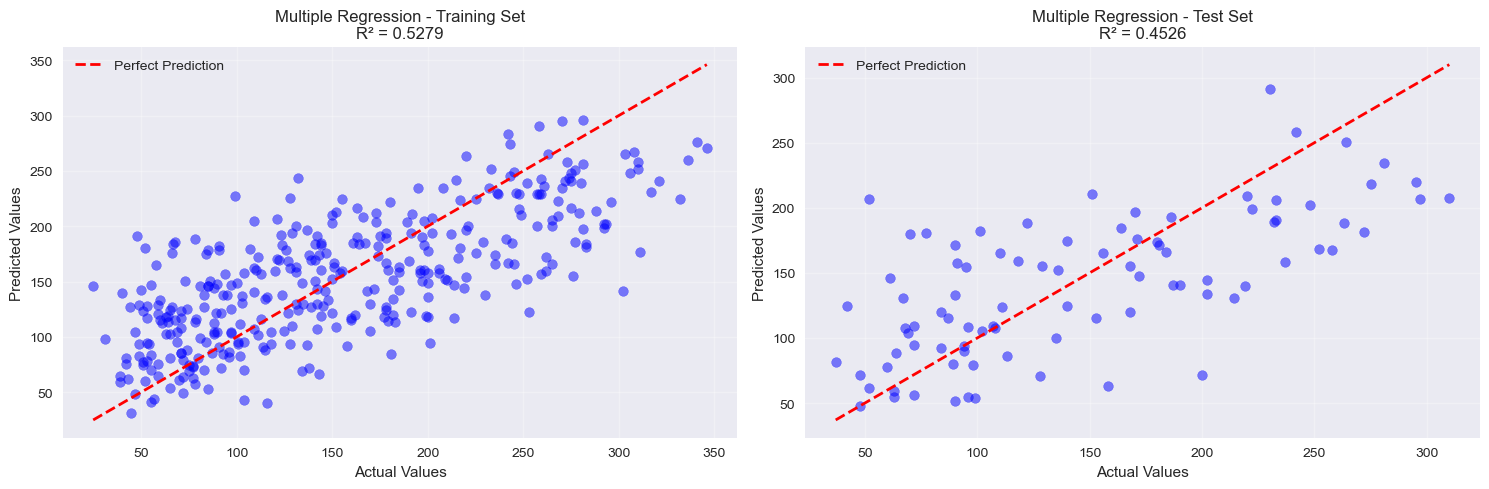

In [89]:
# Visualize Multiple Regression predictions
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Training set: Predicted vs Actual
axes[0].scatter(y_train_multiple, y_train_pred_multiple, alpha=0.5, color='blue')
min_val = min(y_train_multiple.min(), y_train_pred_multiple.min())
max_val = max(y_train_multiple.max(), y_train_pred_multiple.max())
axes[0].plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Values')
axes[0].set_ylabel('Predicted Values')
axes[0].set_title(f'Multiple Regression - Training Set\nR² = {train_r2_multiple:.4f}')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Test set: Predicted vs Actual
axes[1].scatter(y_test_multiple, y_test_pred_multiple, alpha=0.5, color='blue')
min_val = min(y_test_multiple.min(), y_test_pred_multiple.min())
max_val = max(y_test_multiple.max(), y_test_pred_multiple.max())
axes[1].plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Prediction')
axes[1].set_xlabel('Actual Values')
axes[1].set_ylabel('Predicted Values')
axes[1].set_title(f'Multiple Regression - Test Set\nR² = {test_r2_multiple:.4f}')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## Step 4: Polynomial Regression


In [90]:
# Prepare data for Polynomial Regression
# Using all 10 features for polynomial regression
X_poly = diabetes.data  # All 10 features
y = diabetes.target

# Split the data
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(
    X_poly, y, test_size=0.2, random_state=42
)

# Test different polynomial degrees
degrees = [1, 2, 3, 4, 5]
poly_results = {}

for degree in degrees:
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly_transformed = poly_features.fit_transform(X_train_poly)
    X_test_poly_transformed = poly_features.transform(X_test_poly)
    
    # Train model
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly_transformed, y_train_poly)
    
    # Make predictions
    y_train_pred_poly = poly_model.predict(X_train_poly_transformed)
    y_test_pred_poly = poly_model.predict(X_test_poly_transformed)
    
    # Calculate metrics
    train_r2 = r2_score(y_train_poly, y_train_pred_poly)
    test_r2 = r2_score(y_test_poly, y_test_pred_poly)
    train_rmse = np.sqrt(mean_squared_error(y_train_poly, y_train_pred_poly))
    test_rmse = np.sqrt(mean_squared_error(y_test_poly, y_test_pred_poly))
    
    poly_results[degree] = {
        'train_r2': train_r2,
        'test_r2': test_r2,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'model': poly_model,
        'poly_features': poly_features
    }
    
    print(f"Degree {degree}:")
    print(f"  Train R²: {train_r2:.4f}, Test R²: {test_r2:.4f}")
    print(f"  Train RMSE: {train_rmse:.4f}, Test RMSE: {test_rmse:.4f}")
    print()


Degree 1:
  Train R²: 0.5279, Test R²: 0.4526
  Train RMSE: 53.5588, Test RMSE: 53.8534

Degree 2:
  Train R²: 0.6062, Test R²: 0.4156
  Train RMSE: 48.9197, Test RMSE: 55.6420

Degree 3:
  Train R²: 0.8773, Test R²: -14.5613
  Train RMSE: 27.3060, Test RMSE: 287.1342

Degree 4:
  Train R²: 1.0000, Test R²: -26.7281
  Train RMSE: 0.0000, Test RMSE: 383.2853

Degree 5:
  Train R²: 1.0000, Test R²: -25.9929
  Train RMSE: 0.0000, Test RMSE: 378.1701



In [91]:
# Selecting degree 2 for detailed analysis as this seems to have a good balance
degree_selected = 2
poly_features_selected = poly_results[degree_selected]['poly_features']
poly_model_selected = poly_results[degree_selected]['model']

X_train_poly_transformed = poly_features_selected.fit_transform(X_train_poly)
X_test_poly_transformed = poly_features_selected.transform(X_test_poly)

y_train_pred_poly = poly_model_selected.predict(X_train_poly_transformed)
y_test_pred_poly = poly_model_selected.predict(X_test_poly_transformed)

# Calculate detailed metrics
train_mae_poly = mean_absolute_error(y_train_poly, y_train_pred_poly)
train_mse_poly = mean_squared_error(y_train_poly, y_train_pred_poly)
train_rmse_poly = np.sqrt(train_mse_poly)
train_r2_poly = r2_score(y_train_poly, y_train_pred_poly)

test_mae_poly = mean_absolute_error(y_test_poly, y_test_pred_poly)
test_mse_poly = mean_squared_error(y_test_poly, y_test_pred_poly)
test_rmse_poly = np.sqrt(test_mse_poly)
test_r2_poly = r2_score(y_test_poly, y_test_pred_poly)

print(f"Polynomial Regression (Degree {degree_selected}) Results:")
print("-" * 50)
print("Training Set Metrics:")
print(f"  MAE:  {train_mae_poly:.4f}")
print(f"  MSE:  {train_mse_poly:.4f}")
print(f"  RMSE: {train_rmse_poly:.4f}")
print(f"  R²:   {train_r2_poly:.4f}")
print("\nTest Set Metrics:")
print(f"  MAE:  {test_mae_poly:.4f}")
print(f"  MSE:  {test_mse_poly:.4f}")
print(f"  RMSE: {test_rmse_poly:.4f}")
print(f"  R²:   {test_r2_poly:.4f}")


Polynomial Regression (Degree 2) Results:
--------------------------------------------------
Training Set Metrics:
  MAE:  39.1426
  MSE:  2393.1386
  RMSE: 48.9197
  R²:   0.6062

Test Set Metrics:
  MAE:  43.5817
  MSE:  3096.0283
  RMSE: 55.6420
  R²:   0.4156


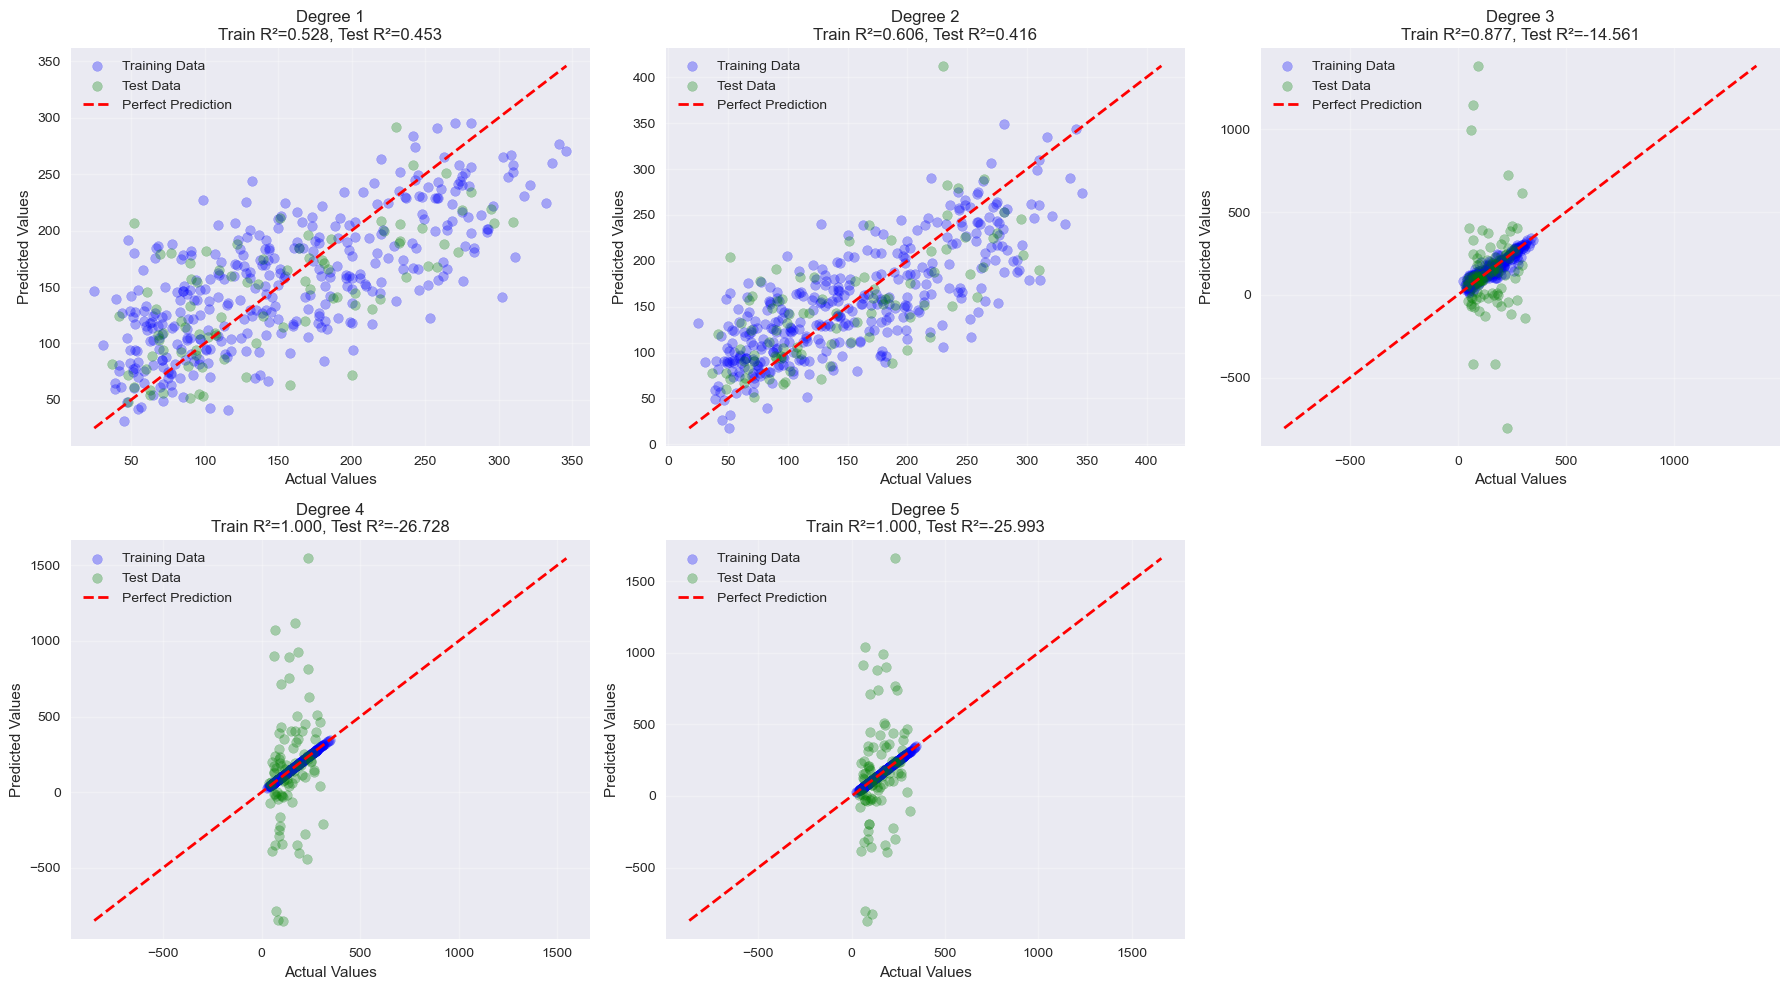

In [92]:
# Visualize Polynomial Regression with different degrees
# plotting predicted vs actual values
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Plot for each degree
for idx, degree in enumerate([1, 2, 3, 4, 5]):
    row = idx // 3
    col = idx % 3
    
    poly_features = poly_results[degree]['poly_features']
    model = poly_results[degree]['model']
    
    # Get predictions for training and test sets
    # Note: poly_features was already fitted during training, so we just use transform
    X_train_poly_transformed = poly_features.transform(X_train_poly)
    X_test_poly_transformed = poly_features.transform(X_test_poly)
    y_train_pred = model.predict(X_train_poly_transformed)
    y_test_pred = model.predict(X_test_poly_transformed)
    
    # Plot predicted vs actual
    axes[row, col].scatter(y_train_poly, y_train_pred, alpha=0.3, color='blue', label='Training Data')
    axes[row, col].scatter(y_test_poly, y_test_pred, alpha=0.3, color='green', label='Test Data')
    
    # Add perfect prediction line
    min_val = min(min(y_train_poly.min(), y_test_poly.min()), min(y_train_pred.min(), y_test_pred.min()))
    max_val = max(max(y_train_poly.max(), y_test_poly.max()), max(y_train_pred.max(), y_test_pred.max()))
    axes[row, col].plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Prediction')
    
    axes[row, col].set_xlabel('Actual Values')
    axes[row, col].set_ylabel('Predicted Values')
    axes[row, col].set_title(f'Degree {degree}\nTrain R²={poly_results[degree]["train_r2"]:.3f}, Test R²={poly_results[degree]["test_r2"]:.3f}')
    axes[row, col].legend()
    axes[row, col].grid(True, alpha=0.3)

# Remove the last subplot
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()


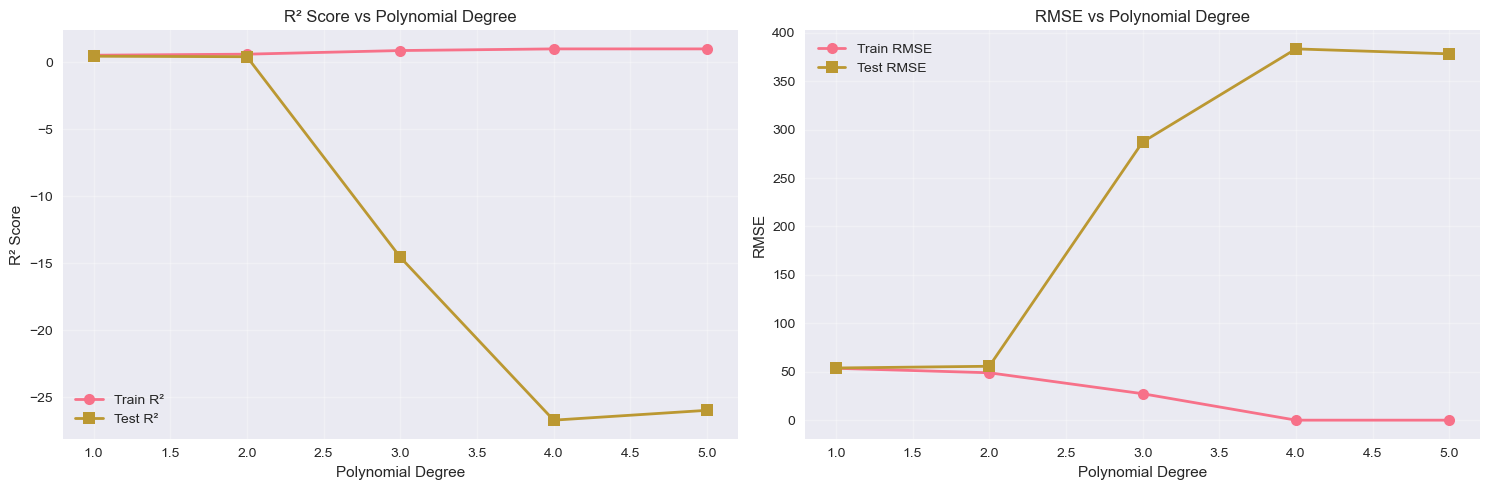

The observations show that lower polynomial degrees, such as 1 or 2, tend to generalize better and are less likely to overfit the data. In contrast, higher degrees like 4 or 5 may fit the training data more closely but often lead to overfitting, creating a noticeable gap between training and testing performance. Overall, degrees 2 or 3 provide a good balance between capturing important patterns and maintaining strong generalization.


In [93]:
# Compare overfitting/underfitting across degrees
degrees_list = list(poly_results.keys())
train_r2_list = [poly_results[d]['train_r2'] for d in degrees_list]
test_r2_list = [poly_results[d]['test_r2'] for d in degrees_list]
train_rmse_list = [poly_results[d]['train_rmse'] for d in degrees_list]
test_rmse_list = [poly_results[d]['test_rmse'] for d in degrees_list]

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# R² comparison
axes[0].plot(degrees_list, train_r2_list, 'o-', label='Train R²', linewidth=2, markersize=8)
axes[0].plot(degrees_list, test_r2_list, 's-', label='Test R²', linewidth=2, markersize=8)
axes[0].set_xlabel('Polynomial Degree')
axes[0].set_ylabel('R² Score')
axes[0].set_title('R² Score vs Polynomial Degree')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# RMSE comparison
axes[1].plot(degrees_list, train_rmse_list, 'o-', label='Train RMSE', linewidth=2, markersize=8)
axes[1].plot(degrees_list, test_rmse_list, 's-', label='Test RMSE', linewidth=2, markersize=8)
axes[1].set_xlabel('Polynomial Degree')
axes[1].set_ylabel('RMSE')
axes[1].set_title('RMSE vs Polynomial Degree')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("The observations show that lower polynomial degrees, such as 1 or 2, tend to generalize better and are less likely to overfit the data. In contrast, higher degrees like 4 or 5 may fit the training data more closely but often lead to overfitting, creating a noticeable gap between training and testing performance. Overall, degrees 2 or 3 provide a good balance between capturing important patterns and maintaining strong generalization.")


## Step 5: Regularization with Ridge and Lasso Regression


In [94]:
# Ridge and Lasso Regression (using all features)
X_reg = diabetes.data
y = diabetes.target

# Split the data
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y, test_size=0.2, random_state=42
)

# Test different alpha values
alphas = [0.01, 0.1,0.2, 0.5, 1.0, 10.0, 100.0, 1000.0]
ridge_results = {}
lasso_results = {}

print("Testing different alpha values for Ridge and Lasso Regression:")
print("-" * 70)

for alpha in alphas:
    # Ridge Regression
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train_reg, y_train_reg)
    y_train_pred_ridge = ridge_model.predict(X_train_reg)
    y_test_pred_ridge = ridge_model.predict(X_test_reg)
    
    ridge_results[alpha] = {
        'train_r2': r2_score(y_train_reg, y_train_pred_ridge),
        'test_r2': r2_score(y_test_reg, y_test_pred_ridge),
        'train_rmse': np.sqrt(mean_squared_error(y_train_reg, y_train_pred_ridge)),
        'test_rmse': np.sqrt(mean_squared_error(y_test_reg, y_test_pred_ridge)),
        'model': ridge_model
    }
    
    # Lasso Regression
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train_reg, y_train_reg)
    y_train_pred_lasso = lasso_model.predict(X_train_reg)
    y_test_pred_lasso = lasso_model.predict(X_test_reg)
    
    lasso_results[alpha] = {
        'train_r2': r2_score(y_train_reg, y_train_pred_lasso),
        'test_r2': r2_score(y_test_reg, y_test_pred_lasso),
        'train_rmse': np.sqrt(mean_squared_error(y_train_reg, y_train_pred_lasso)),
        'test_rmse': np.sqrt(mean_squared_error(y_test_reg, y_test_pred_lasso)),
        'model': lasso_model
    }
    
    print(f"Alpha = {alpha:6.2f} | Ridge Test R²: {ridge_results[alpha]['test_r2']:.4f} | "
          f"Lasso Test R²: {lasso_results[alpha]['test_r2']:.4f}")

# Selecting best alpha 
alpha_selected = 0.10 # as it has the highest R2 score


Testing different alpha values for Ridge and Lasso Regression:
----------------------------------------------------------------------
Alpha =   0.01 | Ridge Test R²: 0.4560 | Lasso Test R²: 0.4567
Alpha =   0.10 | Ridge Test R²: 0.4609 | Lasso Test R²: 0.4719
Alpha =   0.20 | Ridge Test R²: 0.4611 | Lasso Test R²: 0.4677
Alpha =   0.50 | Ridge Test R²: 0.4494 | Lasso Test R²: 0.4441
Alpha =   1.00 | Ridge Test R²: 0.4192 | Lasso Test R²: 0.3576
Alpha =  10.00 | Ridge Test R²: 0.1612 | Lasso Test R²: -0.0120
Alpha = 100.00 | Ridge Test R²: 0.0122 | Lasso Test R²: -0.0120
Alpha = 1000.00 | Ridge Test R²: -0.0095 | Lasso Test R²: -0.0120


In [95]:
# Training Ridge and Lasso with selected alpha
ridge_model = Ridge(alpha=alpha_selected)
lasso_model = Lasso(alpha=alpha_selected)

ridge_model.fit(X_train_reg, y_train_reg)
lasso_model.fit(X_train_reg, y_train_reg)

# Make predictions
y_train_pred_ridge = ridge_model.predict(X_train_reg)
y_test_pred_ridge = ridge_model.predict(X_test_reg)
y_train_pred_lasso = lasso_model.predict(X_train_reg)
y_test_pred_lasso = lasso_model.predict(X_test_reg)

# Calculate metrics for Ridge
train_mae_ridge = mean_absolute_error(y_train_reg, y_train_pred_ridge)
train_mse_ridge = mean_squared_error(y_train_reg, y_train_pred_ridge)
train_rmse_ridge = np.sqrt(train_mse_ridge)
train_r2_ridge = r2_score(y_train_reg, y_train_pred_ridge)

test_mae_ridge = mean_absolute_error(y_test_reg, y_test_pred_ridge)
test_mse_ridge = mean_squared_error(y_test_reg, y_test_pred_ridge)
test_rmse_ridge = np.sqrt(test_mse_ridge)
test_r2_ridge = r2_score(y_test_reg, y_test_pred_ridge)

# Calculate metrics for Lasso
train_mae_lasso = mean_absolute_error(y_train_reg, y_train_pred_lasso)
train_mse_lasso = mean_squared_error(y_train_reg, y_train_pred_lasso)
train_rmse_lasso = np.sqrt(train_mse_lasso)
train_r2_lasso = r2_score(y_train_reg, y_train_pred_lasso)

test_mae_lasso = mean_absolute_error(y_test_reg, y_test_pred_lasso)
test_mse_lasso = mean_squared_error(y_test_reg, y_test_pred_lasso)
test_rmse_lasso = np.sqrt(test_mse_lasso)
test_r2_lasso = r2_score(y_test_reg, y_test_pred_lasso)

print("Ridge Regression Results (alpha = .10):")
print("-" * 50)
print("Training Set Metrics:")
print(f"  MAE:  {train_mae_ridge:.4f}")
print(f"  MSE:  {train_mse_ridge:.4f}")
print(f"  RMSE: {train_rmse_ridge:.4f}")
print(f"  R²:   {train_r2_ridge:.4f}")
print("\nTest Set Metrics:")
print(f"  MAE:  {test_mae_ridge:.4f}")
print(f"  MSE:  {test_mse_ridge:.4f}")
print(f"  RMSE: {test_rmse_ridge:.4f}")
print(f"  R²:   {test_r2_ridge:.4f}")

print("\n" + "-" * 50)
print("Lasso Regression Results (alpha = .10):")
print("-" * 50)
print("Training Set Metrics:")
print(f"  MAE:  {train_mae_lasso:.4f}")
print(f"  MSE:  {train_mse_lasso:.4f}")
print(f"  RMSE: {train_rmse_lasso:.4f}")
print(f"  R²:   {train_r2_lasso:.4f}")
print("\nTest Set Metrics:")
print(f"  MAE:  {test_mae_lasso:.4f}")
print(f"  MSE:  {test_mse_lasso:.4f}")
print(f"  RMSE: {test_rmse_lasso:.4f}")
print(f"  R²:   {test_r2_lasso:.4f}")


Ridge Regression Results (alpha = .10):
--------------------------------------------------
Training Set Metrics:
  MAE:  43.9130
  MSE:  2912.9835
  RMSE: 53.9721
  R²:   0.5206

Test Set Metrics:
  MAE:  42.9969
  MSE:  2856.4869
  RMSE: 53.4461
  R²:   0.4609

--------------------------------------------------
Lasso Regression Results (alpha = .10):
--------------------------------------------------
Training Set Metrics:
  MAE:  44.2727
  MSE:  2935.2582
  RMSE: 54.1780
  R²:   0.5169

Test Set Metrics:
  MAE:  42.8544
  MSE:  2798.1935
  RMSE: 52.8980
  R²:   0.4719


# Explain how regularization parameters (alpha values) influence the model’s behavior and results. 
Regularization parameters(alpha values), control how strongly Ridge and Lasso regression models penalize large coefficients, which directly shapes the model’s complexity and performance. When alpha is small, the penalty is weak and the model behaves very similarly to standard Linear Regression. In this case, coefficients can become large, the model becomes more flexible, and it is more likely to overfit by performing well on the training set but poorly on the test set. When alpha is set to a moderate value, it provides a balanced amount of regularization that reduces noise and improves generalization, often resulting in similar performance on both training and testing data. When alpha is large, the model applies a strong penalty that forces coefficients to shrink significantly. In Ridge regression they become very small, while in Lasso many coefficients become exactly zero. This makes the model too simple and leads to underfitting, which reduces performance on both the training and test sets. In summary, alpha determines the balance between model flexibility and simplicity, where small values risk overfitting, large values risk underfitting, and a carefully chosen value provides the best overall performance.

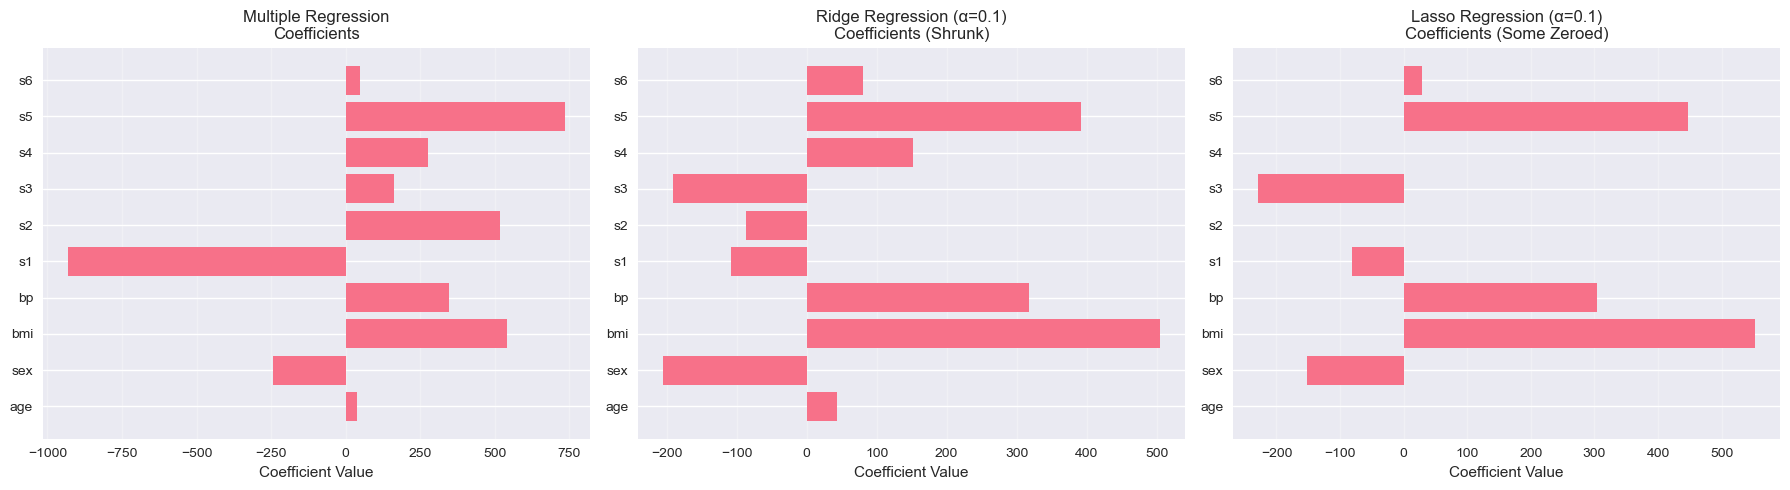


Lasso Regression: 7 out of 10 features have non-zero coefficients
Features with zero coefficients (removed by Lasso):
  - age
  - s2
  - s4


In [96]:
# Compare feature coefficients: Multiple Regression vs Ridge vs Lasso
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Multiple Regression coefficients
axes[0].barh(range(len(diabetes.feature_names)), multiple_lr.coef_)
axes[0].set_yticks(range(len(diabetes.feature_names)))
axes[0].set_yticklabels(diabetes.feature_names)
axes[0].set_xlabel('Coefficient Value')
axes[0].set_title('Multiple Regression\nCoefficients')
axes[0].grid(True, alpha=0.3, axis='x')

# Ridge coefficients
axes[1].barh(range(len(diabetes.feature_names)), ridge_model.coef_)
axes[1].set_yticks(range(len(diabetes.feature_names)))
axes[1].set_yticklabels(diabetes.feature_names)
axes[1].set_xlabel('Coefficient Value')
axes[1].set_title(f'Ridge Regression (α={alpha_selected})\nCoefficients (Shrunk)')
axes[1].grid(True, alpha=0.3, axis='x')

# Lasso coefficients
axes[2].barh(range(len(diabetes.feature_names)), lasso_model.coef_)
axes[2].set_yticks(range(len(diabetes.feature_names)))
axes[2].set_yticklabels(diabetes.feature_names)
axes[2].set_xlabel('Coefficient Value')
axes[2].set_title(f'Lasso Regression (α={alpha_selected})\nCoefficients (Some Zeroed)')
axes[2].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

# Count non-zero coefficients in Lasso
non_zero_lasso = np.sum(lasso_model.coef_ != 0)
print(f"\nLasso Regression: {non_zero_lasso} out of {len(diabetes.feature_names)} features have non-zero coefficients")
print("Features with zero coefficients (removed by Lasso):")
for i, name in enumerate(diabetes.feature_names):
    if lasso_model.coef_[i] == 0:
        print(f"  - {name}")


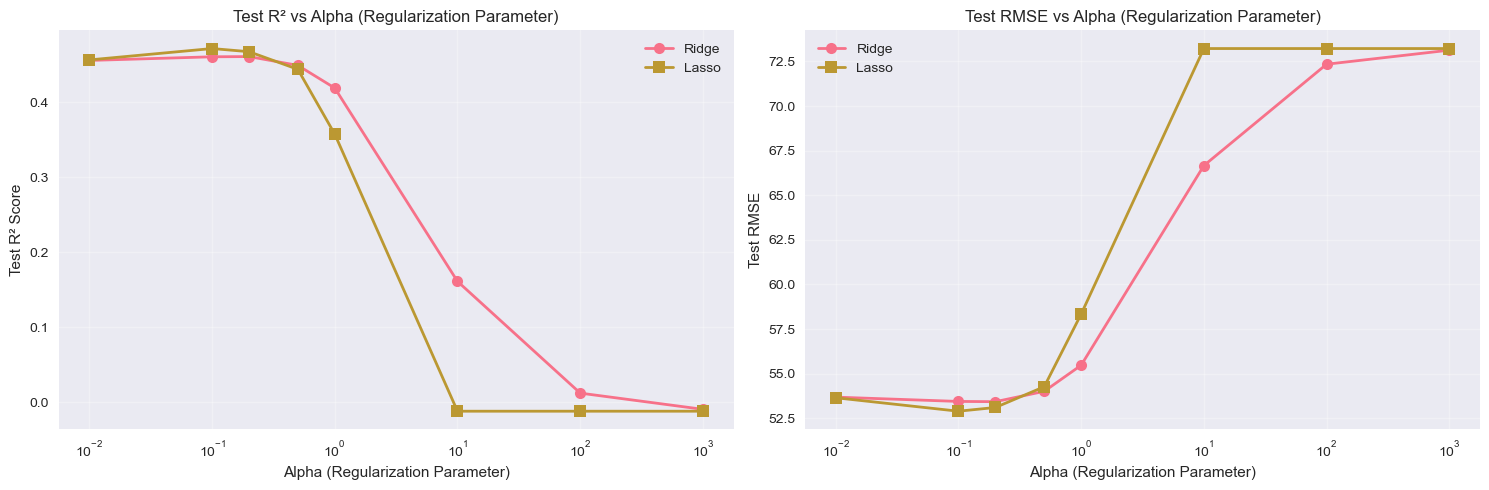

In [97]:
# Visualize how alpha affects Ridge and Lasso
alphas_list = list(ridge_results.keys())
ridge_test_r2 = [ridge_results[a]['test_r2'] for a in alphas_list]
lasso_test_r2 = [lasso_results[a]['test_r2'] for a in alphas_list]
ridge_test_rmse = [ridge_results[a]['test_rmse'] for a in alphas_list]
lasso_test_rmse = [lasso_results[a]['test_rmse'] for a in alphas_list]

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# R² comparison
axes[0].semilogx(alphas_list, ridge_test_r2, 'o-', label='Ridge', linewidth=2, markersize=8)
axes[0].semilogx(alphas_list, lasso_test_r2, 's-', label='Lasso', linewidth=2, markersize=8)
axes[0].set_xlabel('Alpha (Regularization Parameter)')
axes[0].set_ylabel('Test R² Score')
axes[0].set_title('Test R² vs Alpha (Regularization Parameter)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# RMSE comparison
axes[1].semilogx(alphas_list, ridge_test_rmse, 'o-', label='Ridge', linewidth=2, markersize=8)
axes[1].semilogx(alphas_list, lasso_test_rmse, 's-', label='Lasso', linewidth=2, markersize=8)
axes[1].set_xlabel('Alpha (Regularization Parameter)')
axes[1].set_ylabel('Test RMSE')
axes[1].set_title('Test RMSE vs Alpha (Regularization Parameter)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


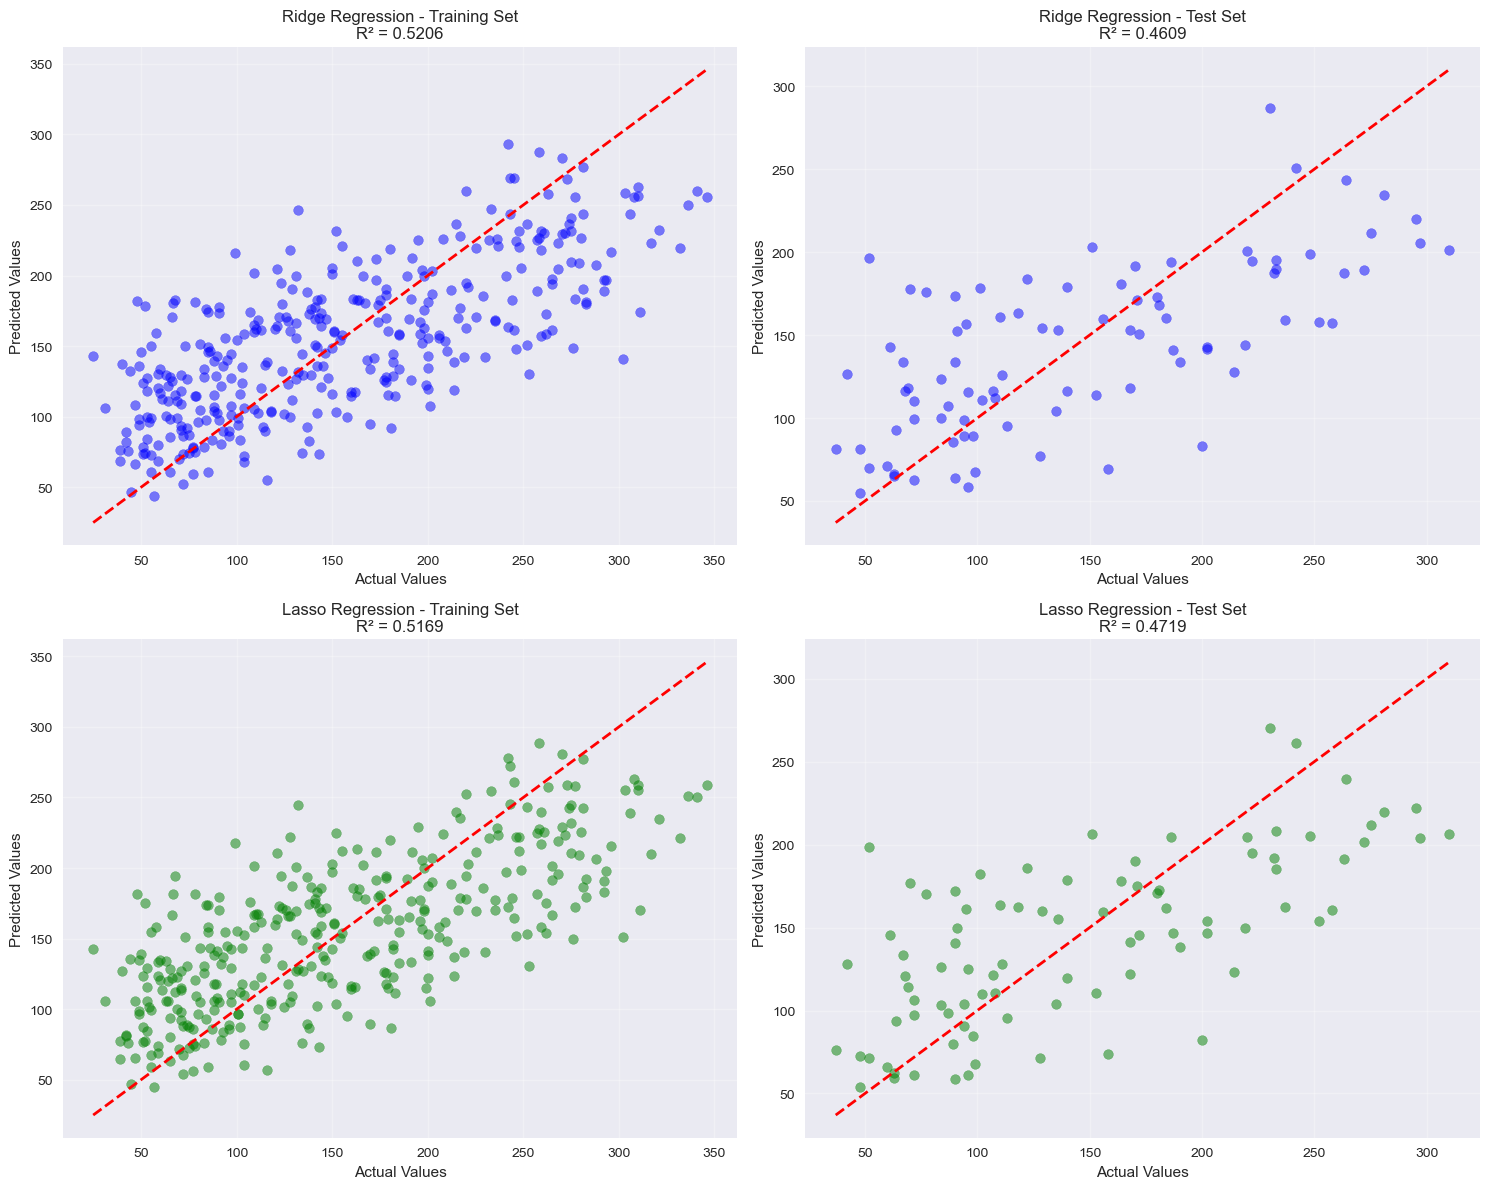

In [98]:
# Visualize predictions: Ridge vs Lasso
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Ridge - Training
axes[0, 0].scatter(y_train_reg, y_train_pred_ridge, alpha=0.5, color='blue')
min_val = min(y_train_reg.min(), y_train_pred_ridge.min())
max_val = max(y_train_reg.max(), y_train_pred_ridge.max())
axes[0, 0].plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2)
axes[0, 0].set_xlabel('Actual Values')
axes[0, 0].set_ylabel('Predicted Values')
axes[0, 0].set_title(f'Ridge Regression - Training Set\nR² = {train_r2_ridge:.4f}')
axes[0, 0].grid(True, alpha=0.3)

# Ridge - Test
axes[0, 1].scatter(y_test_reg, y_test_pred_ridge, alpha=0.5, color='blue')
min_val = min(y_test_reg.min(), y_test_pred_ridge.min())
max_val = max(y_test_reg.max(), y_test_pred_ridge.max())
axes[0, 1].plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2)
axes[0, 1].set_xlabel('Actual Values')
axes[0, 1].set_ylabel('Predicted Values')
axes[0, 1].set_title(f'Ridge Regression - Test Set\nR² = {test_r2_ridge:.4f}')
axes[0, 1].grid(True, alpha=0.3)

# Lasso - Training
axes[1, 0].scatter(y_train_reg, y_train_pred_lasso, alpha=0.5, color='green')
min_val = min(y_train_reg.min(), y_train_pred_lasso.min())
max_val = max(y_train_reg.max(), y_train_pred_lasso.max())
axes[1, 0].plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2)
axes[1, 0].set_xlabel('Actual Values')
axes[1, 0].set_ylabel('Predicted Values')
axes[1, 0].set_title(f'Lasso Regression - Training Set\nR² = {train_r2_lasso:.4f}')
axes[1, 0].grid(True, alpha=0.3)

# Lasso - Test
axes[1, 1].scatter(y_test_reg, y_test_pred_lasso, alpha=0.5, color='green')
min_val = min(y_test_reg.min(), y_test_pred_lasso.min())
max_val = max(y_test_reg.max(), y_test_pred_lasso.max())
axes[1, 1].plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2)
axes[1, 1].set_xlabel('Actual Values')
axes[1, 1].set_ylabel('Predicted Values')
axes[1, 1].set_title(f'Lasso Regression - Test Set\nR² = {test_r2_lasso:.4f}')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## Step 6: Model Comparison and Analysis


In [99]:
# Creating a comprehensive comparison table
comparison_data = {
    'Model': [
        'Simple Linear Regression',
        'Multiple Regression',
        'Polynomial Regression (deg=2)',
        'Ridge Regression (α=.10)',
        'Lasso Regression (α=.10)'
    ],
    'Train MAE': [
        train_mae_simple,
        train_mae_multiple,
        train_mae_poly,
        train_mae_ridge,
        train_mae_lasso
    ],
    'Test MAE': [
        test_mae_simple,
        test_mae_multiple,
        test_mae_poly,
        test_mae_ridge,
        test_mae_lasso
    ],
    'Train RMSE': [
        train_rmse_simple,
        train_rmse_multiple,
        train_rmse_poly,
        train_rmse_ridge,
        train_rmse_lasso
    ],
    'Test RMSE': [
        test_rmse_simple,
        test_rmse_multiple,
        test_rmse_poly,
        test_rmse_ridge,
        test_rmse_lasso
    ],
    'Train R²': [
        train_r2_simple,
        train_r2_multiple,
        train_r2_poly,
        train_r2_ridge,
        train_r2_lasso
    ],
    'Test R²': [
        test_r2_simple,
        test_r2_multiple,
        test_r2_poly,
        test_r2_ridge,
        test_r2_lasso
    ]
}

comparison_df = pd.DataFrame(comparison_data)
print("Model Performance Comparison:")
print("-" * 100)
print(comparison_df.to_string(index=False))


Model Performance Comparison:
----------------------------------------------------------------------------------------------------
                        Model  Train MAE  Test MAE  Train RMSE  Test RMSE  Train R²  Test R²
     Simple Linear Regression  51.379728 52.259976   62.081500  63.732456  0.365724 0.233350
          Multiple Regression  43.483504 42.794095   53.558843  53.853446  0.527919 0.452603
Polynomial Regression (deg=2)  39.142610 43.581693   48.919716  55.641965  0.606158 0.415640
     Ridge Regression (α=.10)  43.913006 42.996932   53.972063  53.446112  0.520607 0.460852
     Lasso Regression (α=.10)  44.272664 42.854428   54.178024  52.897954  0.516941 0.471855


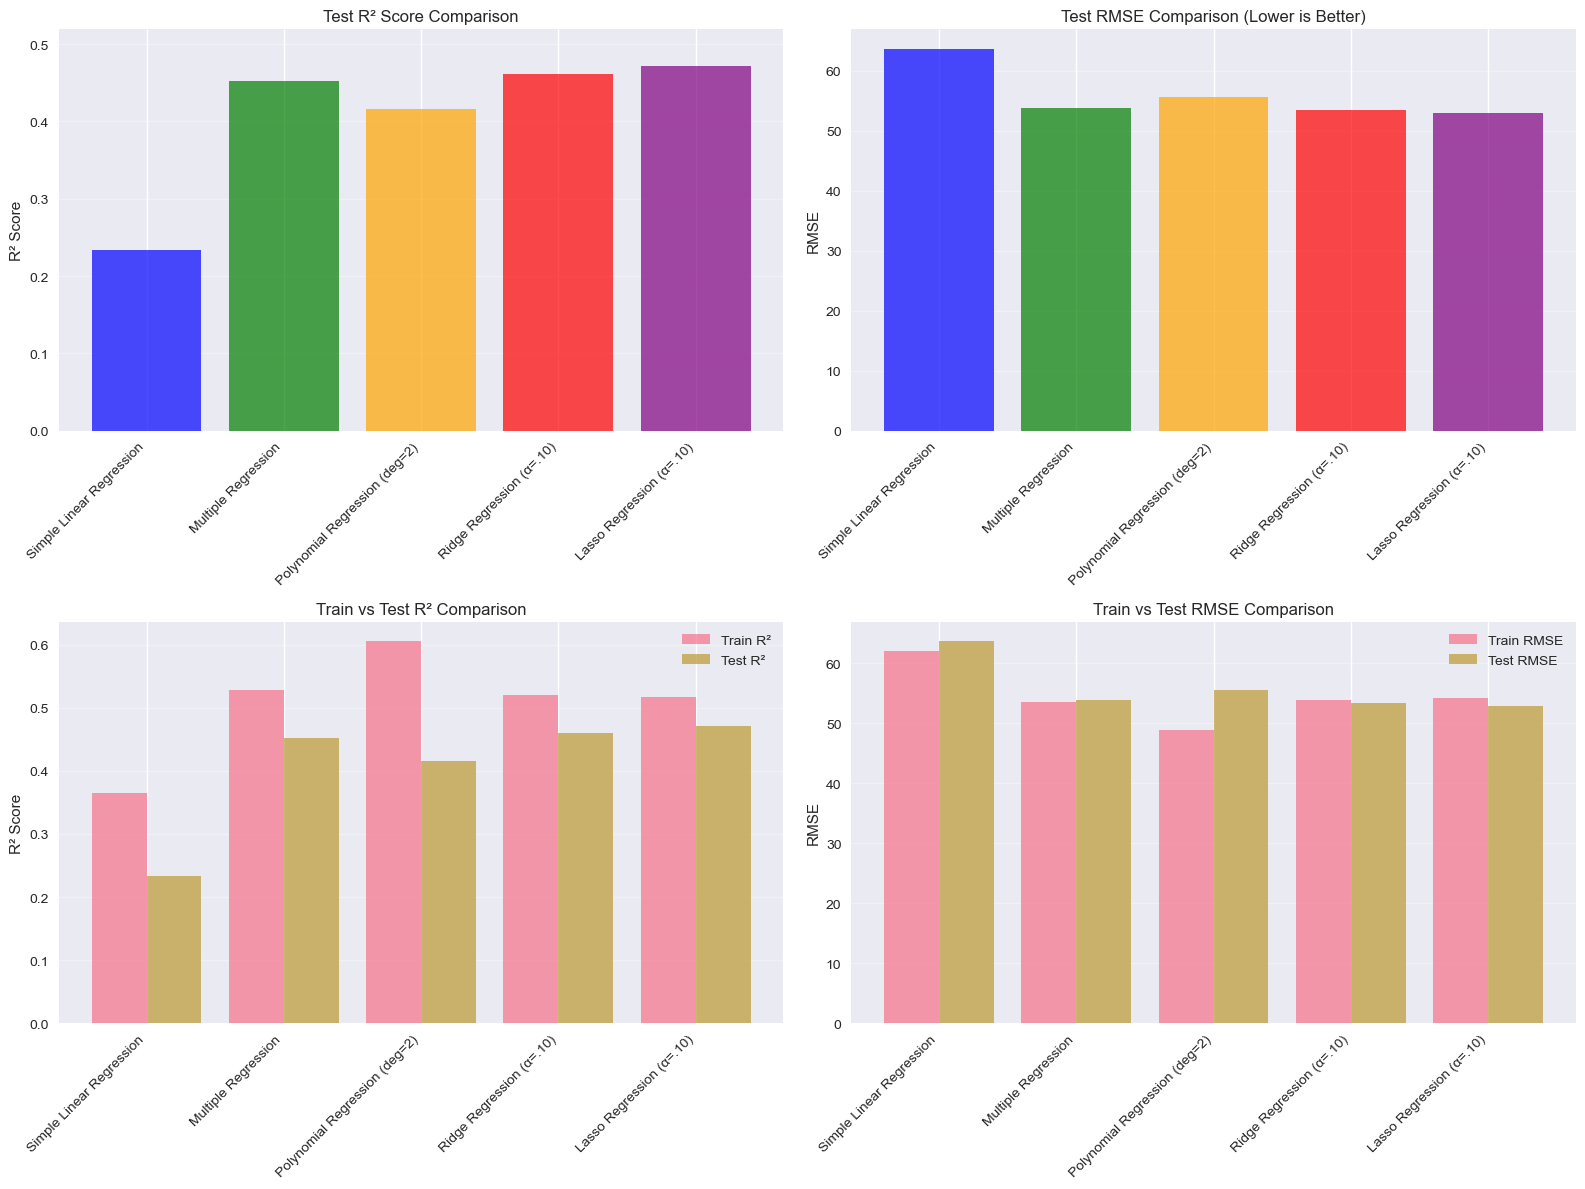

In [100]:
# Visualize model comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

models = comparison_df['Model'].values
x_pos = np.arange(len(models))

# Test R² comparison
axes[0, 0].bar(x_pos, comparison_df['Test R²'], color=['blue', 'green', 'orange', 'red', 'purple'], alpha=0.7)
axes[0, 0].set_xticks(x_pos)
axes[0, 0].set_xticklabels(models, rotation=45, ha='right')
axes[0, 0].set_ylabel('R² Score')
axes[0, 0].set_title('Test R² Score Comparison')
axes[0, 0].grid(True, alpha=0.3, axis='y')
axes[0, 0].set_ylim([0, max(comparison_df['Test R²']) * 1.1])

# Test RMSE comparison
axes[0, 1].bar(x_pos, comparison_df['Test RMSE'], color=['blue', 'green', 'orange', 'red', 'purple'], alpha=0.7)
axes[0, 1].set_xticks(x_pos)
axes[0, 1].set_xticklabels(models, rotation=45, ha='right')
axes[0, 1].set_ylabel('RMSE')
axes[0, 1].set_title('Test RMSE Comparison (Lower is Better)')
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Train vs Test R²
axes[1, 0].bar(x_pos - 0.2, comparison_df['Train R²'], width=0.4, label='Train R²', alpha=0.7)
axes[1, 0].bar(x_pos + 0.2, comparison_df['Test R²'], width=0.4, label='Test R²', alpha=0.7)
axes[1, 0].set_xticks(x_pos)
axes[1, 0].set_xticklabels(models, rotation=45, ha='right')
axes[1, 0].set_ylabel('R² Score')
axes[1, 0].set_title('Train vs Test R² Comparison')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Train vs Test RMSE
axes[1, 1].bar(x_pos - 0.2, comparison_df['Train RMSE'], width=0.4, label='Train RMSE', alpha=0.7)
axes[1, 1].bar(x_pos + 0.2, comparison_df['Test RMSE'], width=0.4, label='Test RMSE', alpha=0.7)
axes[1, 1].set_xticks(x_pos)
axes[1, 1].set_xticklabels(models, rotation=45, ha='right')
axes[1, 1].set_ylabel('RMSE')
axes[1, 1].set_title('Train vs Test RMSE Comparison')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


# Key Observations and Analysis

## Model Performance: 
The Simple Linear Regression model showed the weakest performance, with the highest MAE and RMSE values and the lowest R² scores, indicating that using a single feature is insufficient to capture the complexity of the Diabetes dataset. Multiple Regression improved performance significantly by reducing errors and increasing R² scores through the use of all features. Polynomial Regression (degree 2) further reduced training errors and achieved the highest training R², suggesting it captured non-linear relationships, but the higher test RMSE and slightly lower test R² compared to Multiple Regression indicate some overfitting. Ridge and Lasso Regression with α = 0.10 achieved balanced results, maintaining slightly higher training errors than Polynomial Regression while improving test performance, demonstrating effective regularization.

## Handling Overfitting and Performance Improvement: 
Polynomial Regression showed signs of overfitting, as its training errors were very low but test errors were higher. Ridge and Lasso Regression with α = 0.10 successfully mitigated overfitting by penalizing large coefficients, keeping training performance reasonable while slightly improving test R² scores compared to Multiple Regression. Lasso, in particular, slightly outperformed Ridge on test R², suggesting it helped reduce unnecessary feature contributions, simplifying the model without sacrificing predictive power.

## Insights about the Diabetes Dataset: 
The results indicate that the Diabetes dataset contains multiple relevant features and some non-linear relationships, as reflected in the improved performance of Multiple and Polynomial Regression. Nevertheless, the moderate R² scores even in the best models suggest that the dataset contains variability that is not fully captured by linear or simple polynomial models. Regularization, as seen in Ridge and Lasso with α = 0.10, is valuable for stabilizing predictions and reducing overfitting, emphasizing the importance of controlling feature influence when modeling this dataset.
